In [1]:
import os
from os import path

os.environ["DEBUG"] = "true"

In [2]:
import os
from os import path

import random

import cv2
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
import evaluate

from PIL import Image

from transformers import VisionEncoderDecoderModel, AutoTokenizer, TrOCRProcessor
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers import default_data_collator

from data_aug_v2 import build_data_aug
from torch.utils.data import Subset
from tang_syn import synthesize
from train import OCRDataset, EvalDataset

MAX_LENGTH = 64

class InspectionDataset(OCRDataset):
    def __getitem__(self, idx):
        return self.get_image_and_text(idx)

def load_datasets(processor, tokenizer):
    dataset_dir = 'dataset/data'

    train_dataset = InspectionDataset(dataset_dir=dataset_dir,
                               labels_dir="dataset/labels/train",
                               tokenizer=tokenizer,
                               processor=processor,
                               mode="online",
                               transform=build_data_aug(
                                   height=64, mode="train", resizepad=True),
                               max_target_length=MAX_LENGTH)

    # Define the number of samples to keep in eval dataset

    eval_dataset = EvalDataset(dataset_dir=dataset_dir,
                               labels_dir="dataset/labels/test-ic13",
                               tokenizer=tokenizer,
                               processor=processor,
                               mode="eval",
                               transform=build_data_aug(
                                   height=64, mode="eval", resizepad=True),
                               max_target_length=MAX_LENGTH)

    # Create a random subset of the dataset
    num_samples = 100
    subset_indices = torch.randperm(len(eval_dataset))[:num_samples]
    eval_dataset = Subset(eval_dataset, subset_indices.tolist())

    print("Number of training examples:", len(train_dataset))
    print("Number of validation examples:", len(eval_dataset))

    return train_dataset, eval_dataset


model_pth = 'models/tang-syn-5.0-online-epoch-1'

tokenizer = AutoTokenizer.from_pretrained(model_pth)
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
train_dataset, eval_dataset = load_datasets(
    processor=processor, tokenizer=tokenizer)

/opt/conda/envs/py_3.8/lib/python3.8/site-packages/torchvision-0.16.0a0+29418e3-py3.8-linux-x86_64.egg/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/opt/conda/envs/py_3.8/lib/python3.8/site-packages/torchvision-0.16.0a0+29418e3-py3.8-linux-x86_64.egg/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking 

pygame 2.5.0 (SDL 2.28.0, Python 3.8.17)
Hello from the pygame community. https://www.pygame.org/contribute.html


  0%|          | 0/1611 [00:00<?, ?it/s]


Usable font: 1


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
100%|██████████| 1/1 [00:00<00:00, 109.74it/s]

Number of training examples: 1280000
Number of validation examples: 100


9座，2908延长米， 隧道13座，2627延长米。
父成昆所杀。此后一直尝试为此报仇，却曾两次败于成昆手下。后来成昆失
地质
标津线
可以看出他比本乡猛更习惯战斗。
在1861年提出了缔约上过失的概念后，虽然在1900年的德国民法典(BGB)已有将此概念纳入，但却未设有一般性的规定，而仅对于意
厄瓜多尔尔
来。东汉末，曹操在青州收编了三十万黄巾队伍，形成了青州兵
1998年
社区、杭州路社区、河头源社区、华云社区、兰州西路社区、捎门里社区、响堂村社区、站东社区


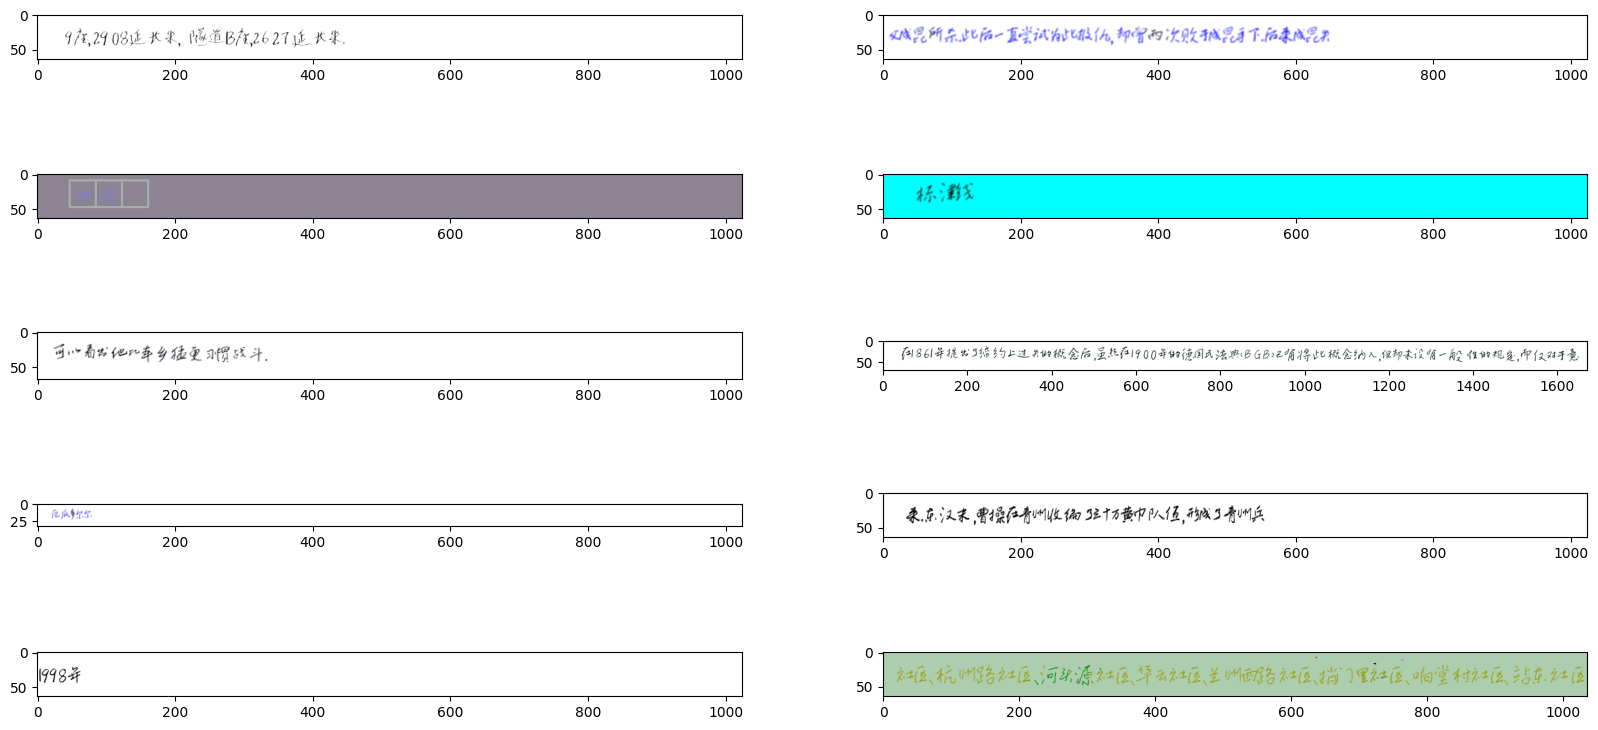

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Set the figure size

length = len(train_dataset)


for i in range(10):

    random_index = random.randint(0, length - 1)
    res = train_dataset[random_index]

    plt.subplot(5, 2, i+1)  # Create a subplot for each image
    plt.imshow(res[0])  # Display the image

    print(res[1])

plt.show()